## Ground Truth Test

In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import CIFAR10      
from torch.utils.data import DataLoader
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter
from src.inception import inception_v3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dict_path = "C:\\Users\\jiayang\\ipynb\\trainedModel\\Inception_CIFAR10.pth"
model = inception_v3(pretrained=True, dict_path=dict_path).to(device)

# preprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),       
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  
])

# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.2).to(device)
model.set_temperature(temp_scal_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.05

Loading weights from: C:\Users\jiayang\ipynb\trainedModel\Inception_CIFAR10.pth
Files already downloaded and verified
Before temperature - NLL: 0.358, ECE: 0.029
Optimal temperature: 5.125
After temperature - NLL: 0.890, ECE: 0.412


APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9244 ± 0.0036
Final Average Prediction Set Size: 1.08 ± 0.01
Final Average Coverage: 0.9451 ± 0.0052
Final Average Real Probability: 0.9218 ± 0.0054


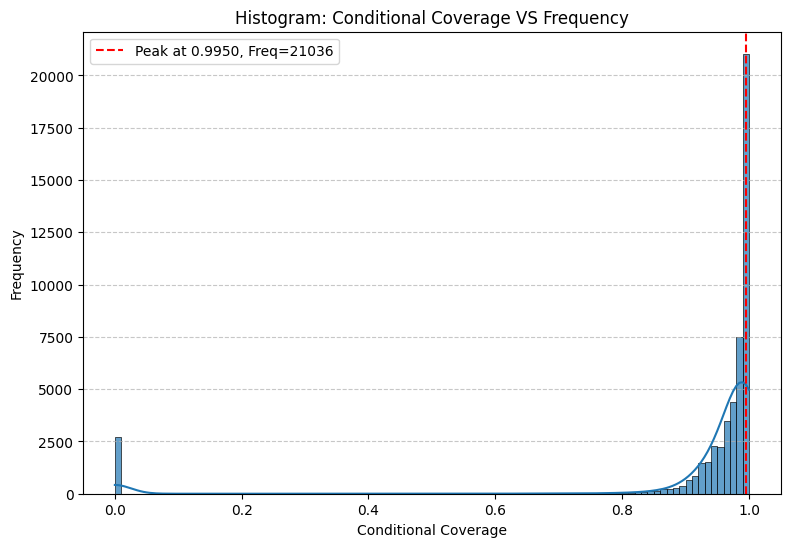

21036 (42.07%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9246 ± 0.0037
Final Average Prediction Set Size: 1.05 ± 0.01
Final Average Coverage: 0.9448 ± 0.0054
Final Average Real Probability: 0.9192 ± 0.0053


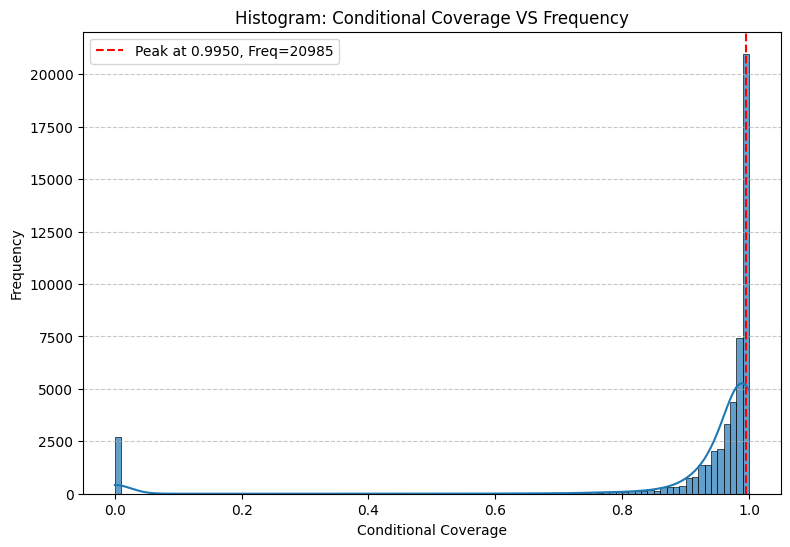

20985 (41.97%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9322 ± 0.0027
Final Average Prediction Set Size: 0.98 ± 0.00
Final Average Coverage: 0.9504 ± 0.0028
Final Average Real Probability: 0.9160 ± 0.0026


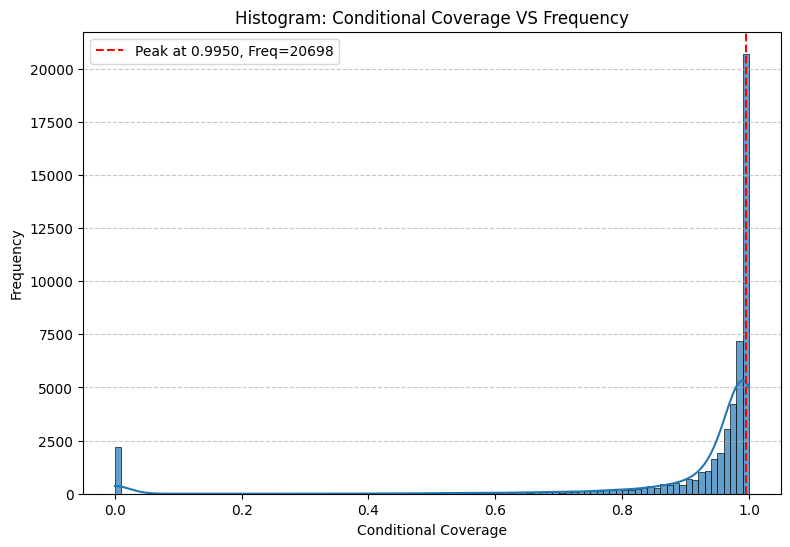

20698 (41.40%) samples reached the peak conditional coverage at 0.9950


In [4]:
saps_cifar10h_hist(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.05)

## Model Test

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6770 ± 0.0055
Final Average Prediction Set Size: 2.52 ± 0.04
Final Average Coverage: 0.9505 ± 0.0029
Final Average Real Probability: 0.9353 ± 0.0029


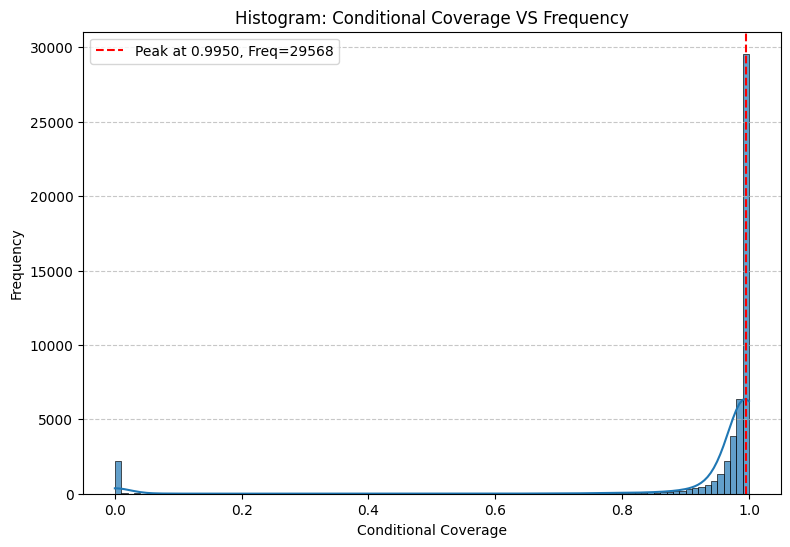

29568 (59.14%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6770 ± 0.0055
Final Average Prediction Set Size: 2.52 ± 0.04
Final Average Coverage: 0.9505 ± 0.0029
Final Average Real Probability: 0.9353 ± 0.0029


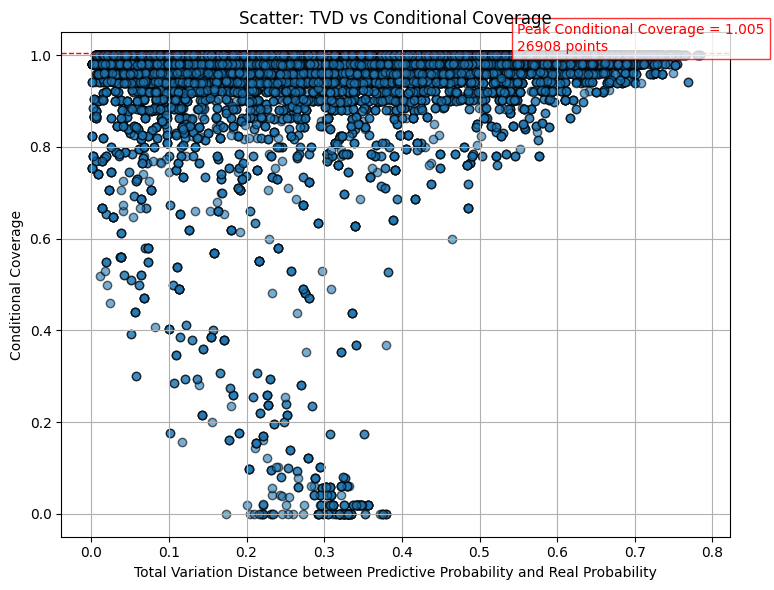

Peak Conditional Coverage = 1.005, with 26908 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.80788']
  Real Probability Set      : ['0.94231']
Sample 2:
  Predictive Probability Set: ['0.81297']
  Real Probability Set      : ['1.00000']
Sample 3:
  Predictive Probability Set: ['0.87449']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.18819', '0.18073', '0.17021', '0.12111']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.26662', '0.20355', '0.17952']
  Real Probability Set      : ['0.00000', '0.01887', '0.03774']
Sample 3:
  Predictive Probability Set: ['0.20747', '0.13268', '0.12184', '0.11607', '0.10277']
  Real Probability Set      : ['0.00000', '0.08163', '0.02041', '0.00000', '0.02041']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:


In [5]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7196 ± 0.0051
Final Average Prediction Set Size: 1.87 ± 0.01
Final Average Coverage: 0.9508 ± 0.0019
Final Average Real Probability: 0.9305 ± 0.0018


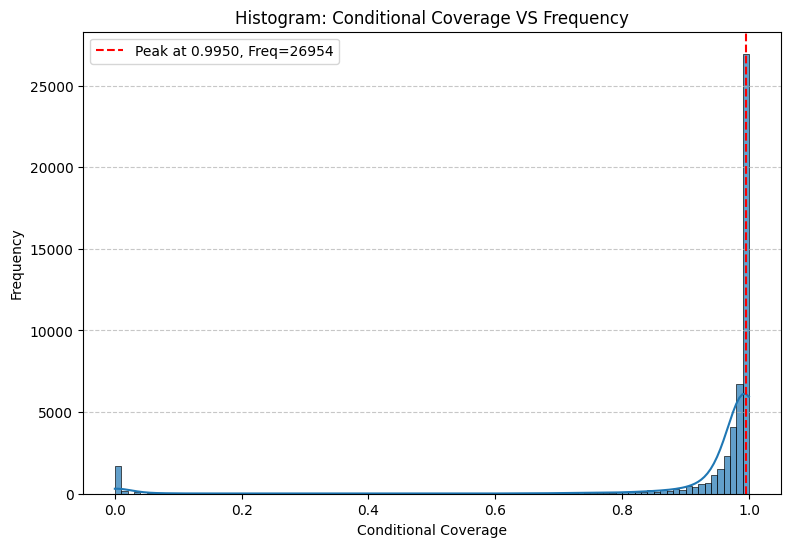

26954 (53.91%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.05, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.7196 ± 0.0051
Final Average Prediction Set Size: 1.87 ± 0.01
Final Average Coverage: 0.9508 ± 0.0019
Final Average Real Probability: 0.9305 ± 0.0018


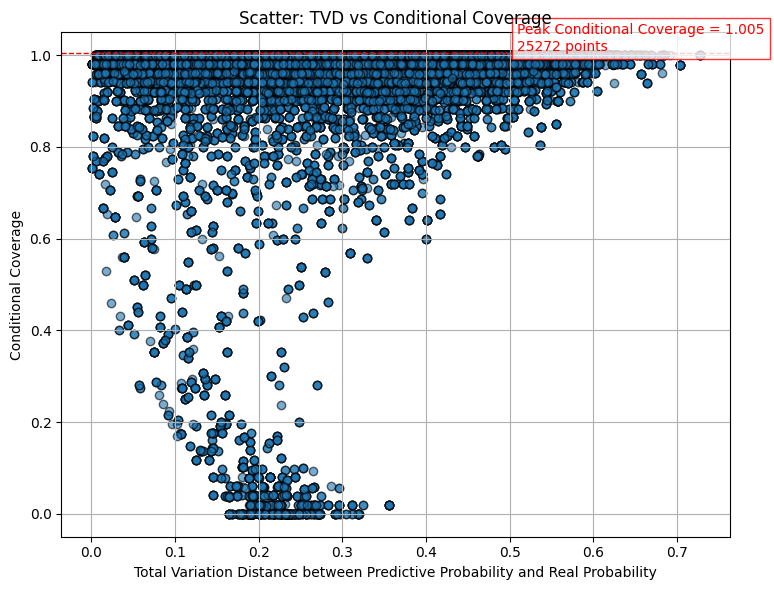

Peak Conditional Coverage = 1.005, with 25272 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.78447']
  Real Probability Set      : ['0.98077']
Sample 2:
  Predictive Probability Set: ['0.93083']
  Real Probability Set      : ['1.00000']
Sample 3:
  Predictive Probability Set: ['0.90627']
  Real Probability Set      : ['0.98077']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.21626', '0.21284']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.62495']
  Real Probability Set      : ['0.09434']
Sample 3:
  Predictive Probability Set: ['0.26930', '0.18269']
  Real Probability Set      : ['0.00000', '0.04082']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.35473', '0.32236']
  Real Probability Set      : ['0.00000', '0.75000']
Sample 2:
  Predictive Probability Set: ['0.1495

In [6]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.05)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9854 ± 0.0365
Final Average Prediction Set Size: 1.46 ± 0.04
Final Average Coverage: 0.9505 ± 0.0032
Final Average Real Probability: 0.9255 ± 0.0035


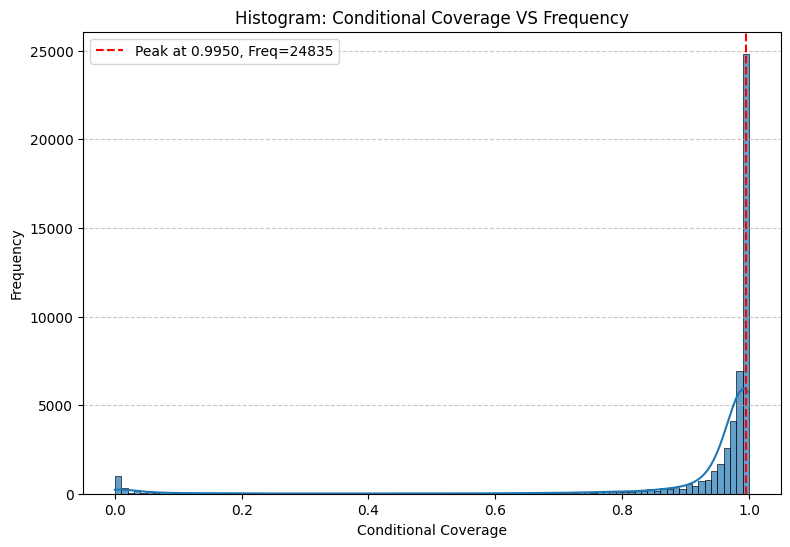

24835 (49.67%) samples reached the peak conditional coverage at 0.9950


In [2]:
saps_cifar10h_hist(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.05, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.05), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.9854 ± 0.0365
Final Average Prediction Set Size: 1.46 ± 0.04
Final Average Coverage: 0.9505 ± 0.0032
Final Average Real Probability: 0.9255 ± 0.0035


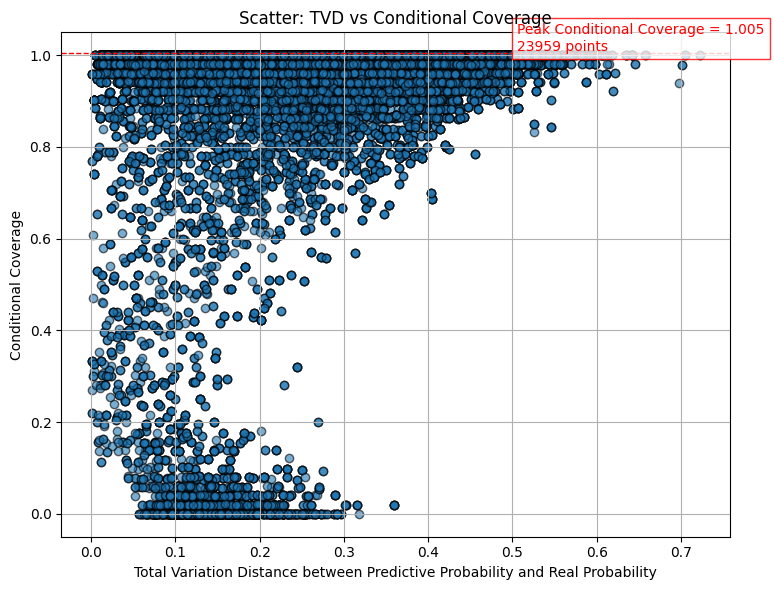

Peak Conditional Coverage = 1.005, with 23959 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.80427']
  Real Probability Set      : ['1.00000']
Sample 2:
  Predictive Probability Set: ['0.76121', '0.06323']
  Real Probability Set      : ['0.92000', '0.06000']
Sample 3:
  Predictive Probability Set: ['0.95308']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.26728', '0.17094']
  Real Probability Set      : ['0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.51644']
  Real Probability Set      : ['0.00000']
Sample 3:
  Predictive Probability Set: ['0.27612', '0.22970']
  Real Probability Set      : ['0.00000', '0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.16684', '0.16185']
  Real Probability Set      : ['0.78000', '0.00000']
Sample 2:
  Predictive Pro

In [4]:
saps_cifar10h_scatter(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.05)